## Task 1

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', None)
#
RANDSTATE = 11

### Data

In [2]:
data = pd.read_csv("recruitment_task.csv")
data.head()

,group,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46
0,B,AA,R,1.344034,631.337666,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,AA,R,2.397800,11846.932969,1716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,AA,R,20.381491,3.817035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3,B,AA,R,5.687507,9529.610739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B,AA,R,4.567899,6.488960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(150000, 48)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 48 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   group   150000 non-null  object 
 1   f0      150000 non-null  object 
 2   f1      149904 non-null  object 
 3   f2      150000 non-null  float64
 4   f3      150000 non-null  float64
 5   f4      14958 non-null   float64
 6   f5      4088 non-null    float64
 7   f6      73 non-null      float64
 8   f7      983 non-null     float64
 9   f8      391 non-null     float64
 10  f9      272 non-null     float64
 11  f10     1630 non-null    float64
 12  f11     3815 non-null    float64
 13  f12     2449 non-null    float64
 14  f13     946 non-null     float64
 15  f14     6145 non-null    float64
 16  f15     5564 non-null    float64
 17  f16     251 non-null     float64
 18  f17     5107 non-null    float64
 19  f18     1565 non-null    float64
 20  f19     1720 non-null    float64
 21  f20     11

Only first five columns are not "sparse" ("sparse" in the meaning of having majority of NULLs).

Let's divide variables into groups.

In [5]:
target_var = "group"

Now we need to distinct between "dense" and "sparse" variables. \
It's easy here to set the "sparsity" threshold.

In [6]:
def variables_sparsity(df, threshold=.5):
    sparse_vars = df.apply(lambda col: col.isnull().sum() > df.shape[0] * threshold)
    sparse_vars = sparse_vars.index[sparse_vars].tolist()
    dense_vars = df.columns.difference(sparse_vars).tolist()
    return dense_vars, sparse_vars

dense_vars, sparse_vars = variables_sparsity(data.drop(target_var, axis=1))
print("dense variables:")
print(data.dtypes[dense_vars])
print()
print("sparse variables:")
print(data.dtypes[sparse_vars])

dense variables:
f0     object
f1     object
f2    float64
f3    float64
dtype: object

sparse variables:
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f10    float64
f11    float64
f12    float64
f13    float64
f14    float64
f15    float64
f16    float64
f17    float64
f18    float64
f19    float64
f20    float64
f21    float64
f22    float64
f23    float64
f24    float64
f25    float64
f26    float64
f27    float64
f28    float64
f29    float64
f30    float64
f31    float64
f32    float64
f33    float64
f34    float64
f35    float64
f36    float64
f37    float64
f38    float64
f39    float64
f40    float64
f41    float64
f42    float64
f43    float64
f44    float64
f45    float64
f46    float64
dtype: object


### dense variables

In [7]:
data[dense_vars].count()

f0    150000
f1    149904
f2    150000
f3    150000
dtype: int64

In [8]:
data.f1.unique()

array(['R', 'S', 'T', 'V', 'W', 'X', 'Y', 'Z', nan], dtype=object)

In [9]:
from sklearn.impute import SimpleImputer
data[dense_vars] = SimpleImputer(strategy="constant", fill_value="NA") \
    .fit_transform(data[dense_vars])

for n, c in data.iloc[:,0:3].iteritems():
    print(" {:s} :".format(n))
    print(c.value_counts())

 group :
B    125428
A     24572
Name: group, dtype: int64
 f0 :
AB    58130
AD    44018
AE    26105
AC    11617
AA    10130
Name: f0, dtype: int64
 f1 :
R     50183
S     33713
V     23177
T     19261
W     16428
X      5125
Y      1919
Z        98
NA       96
Name: f1, dtype: int64


### sparse variables

In [10]:
sdata = data[sparse_vars]

def no_nulls_in_row_distribution(df):
    df_rsum = df.notna().sum(axis=1)
    return pd.DataFrame(
                { "count": df_rsum.value_counts(),
                  "ratio": df_rsum.value_counts()/df.shape[0]
                }
            )

no_nulls_in_row_distribution(sdata)

,count,ratio
1,149398,0.995987
2,582,0.003880
3,20,0.000133


It shows that less then 0.5% of records has more then 1 non-empty field for "sparse variables".\
Thus at first approach to this data we may assume that all "sparse variables" are like one-hot encoded one categorical variable (say `factor`) times some numeric variable (say `value`). For records with more then one non-empty field for "sparse variable" we'll choose the first non-empty field.

First, let's summarise the distribution of (non-null) values for "sparse variables": 

In [11]:
print("Nr of negative values: {:d}".format((sdata < 0).sum(axis=0).sum()))     # 0
print("Nr of zero values: {:d}".format((sdata == 0).sum(axis=0).sum()))    # 0
print("Nr of positive values: {:d}".format((sdata > 0).sum(axis=0).sum()))  

Nr of negative values: 0
Nr of zero values: 0
Nr of positive values: 150622


### Data in compact form

#### Predictors

In [12]:
X0 = data[dense_vars].copy()
X0['factor'] = sdata.apply(lambda r: r.index[r.notna()][0], axis=1)   # slow
X0['value'] = sdata.apply(lambda r: r[r.notna()][0], axis=1)          # slow
X0.head()

,f0,f1,f2,f3,factor,value
0,AA,R,1.344034,631.337666,f10,1.0
1,AA,R,2.397800,11846.932969,f4,1716.0
2,AA,R,20.381491,3.817035,f46,6.0
3,AA,R,5.687507,9529.610739,f36,1489.0
4,AA,R,4.567899,6.488960,f27,46.0


#### Target

In [13]:
y0 = data[target_var]
y0.value_counts()

B    125428
A     24572
Name: group, dtype: int64

### EDA

f0       AA     AB    AC     AD     AE
group                                 
A      1542   7094  1794   7776   6366
B      8588  51036  9823  36242  19739


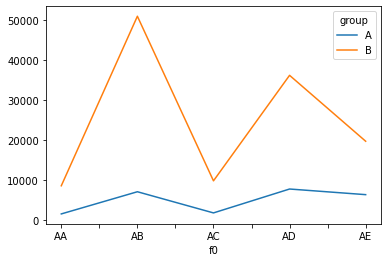

In [14]:
X1 = pd.concat([X0, y0], axis=1)
print(pd.pivot_table(X1, index="group", columns="f0", aggfunc=len, values="f1"))
pd.pivot_table(X1, index="f0", columns="group", aggfunc=len, values="f1").plot()

f1     NA      R      S      T      V      W     X     Y   Z
group                                                       
A      23   8493   5582   2894   3995   2408   836   319  22
B      73  41690  28131  16367  19182  14020  4289  1600  76


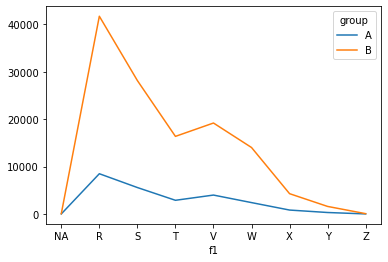

In [15]:
print(pd.pivot_table(X1, index="group", columns="f1", aggfunc=len, values="f0"))
pd.pivot_table(X1, index="f1", columns="group", aggfunc=len, values="f0").plot()

factor   f10   f11   f12  f13   f14   f15  f16   f17   f18   f19  f20   f21  \
group                                                                         
A        279   560   430  184  1482   824   98   697   163   338   23   870   
B       1349  3249  2017  761  4651  4721  153  4397  1389  1365   91  5056   

factor  f22   f23   f24   f25   f26    f27  f28  f29  f30  f31  f32   f33  \
group                                                                       
A        84   193   246   305  1146   2064   14  106   17    4  163  1299   
B       662  1088  1365  1974  5236  10235   67  763   37   27  598  5050   

factor   f34   f35    f36  f37   f38   f39     f4   f40  f41  f42   f43   f44  \
group                                                                           
A        962  1479   3454  118   795   506   2135   467  161  142   636   104   
B       5202  6905  14651  848  7738  3548  12823  2232  635  844  3531  1026   

factor  f45   f46    f5  f6   f7   f8   f9  
grou

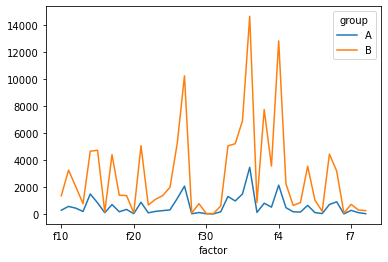

In [16]:
print(pd.pivot_table(X1, index="group", columns="factor", aggfunc=len, values="f0"))
pd.pivot_table(X1, index="factor", columns="group", aggfunc=len, values="f0").plot()

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

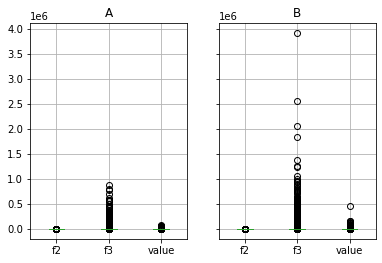

In [17]:
X1.groupby("group").boxplot()

These plots are obscure, apparently because of skewness of numeric variables.

### More plots

(array([125428.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24572.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

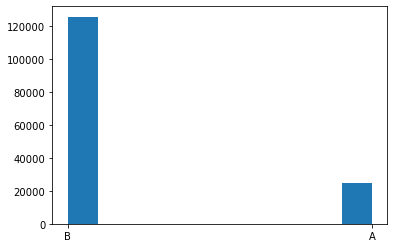

In [18]:
plt.hist(y0)

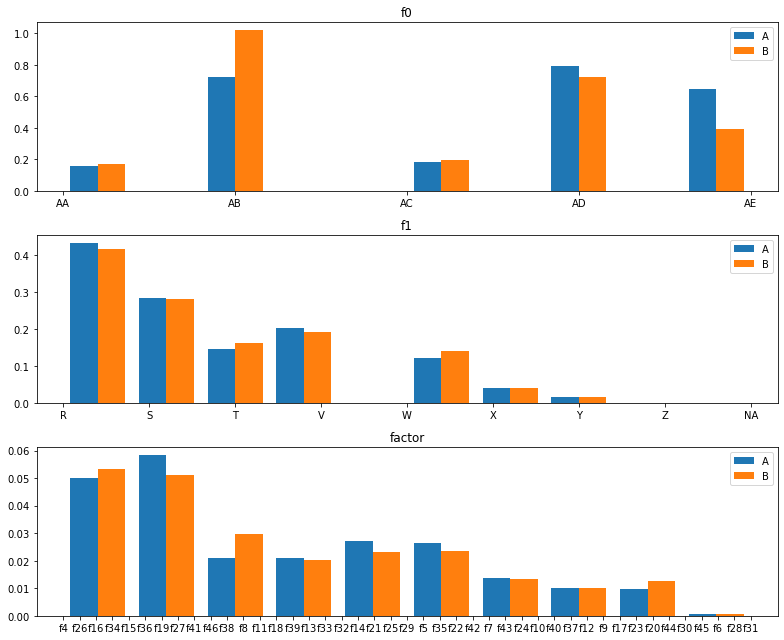

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(11, 9))
for i, var in enumerate(['f0', 'f1', 'factor']):
    xi = X0[var]
    ax[i].hist([xi[y0=="A"], xi[y0=="B"]], histtype="bar", density=True, label=["A", "B"])  #!
    ax[i].set_title(var)
    ax[i].legend()
fig.tight_layout()

In [20]:
from scipy.stats import gaussian_kde

def plots(varname, Max=None, X=X1):
    variable = X[varname]
    
    if Max is None:
        title = varname
    else:
        title = "{:s} < {:d}".format(varname, Max)
        variable = variable[variable < Max]
        
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
    ax0.hist(variable, bins=50)
    ax0.set_title("histogram")
    ax1.scatter(variable, range(len(variable)), s=.1)
    ax1.set_title("cloud")
    ax2.boxplot(variable, vert=False)
    ax2.set_title("boxplot")
    density = gaussian_kde(variable)
    xx = np.linspace(min(variable), max(variable), 1000)
    ax3.plot(xx, density(xx))
    ax3.set_title("density")
    
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

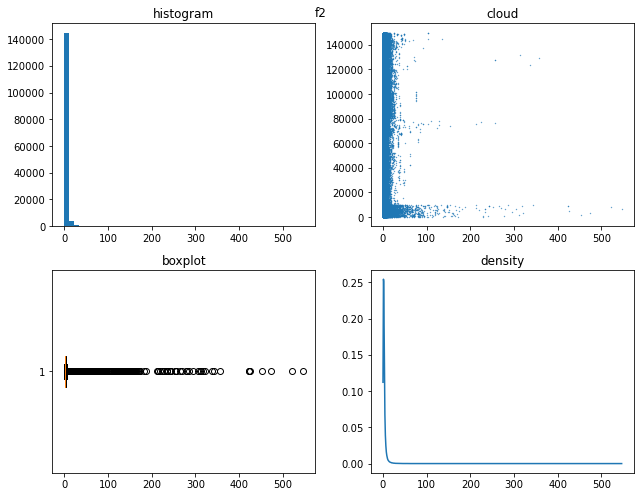

In [21]:
plots("f2")

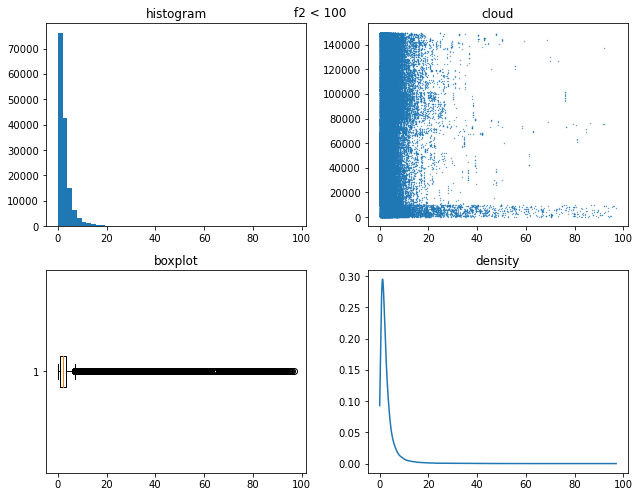

In [22]:
plots("f2", Max=100)

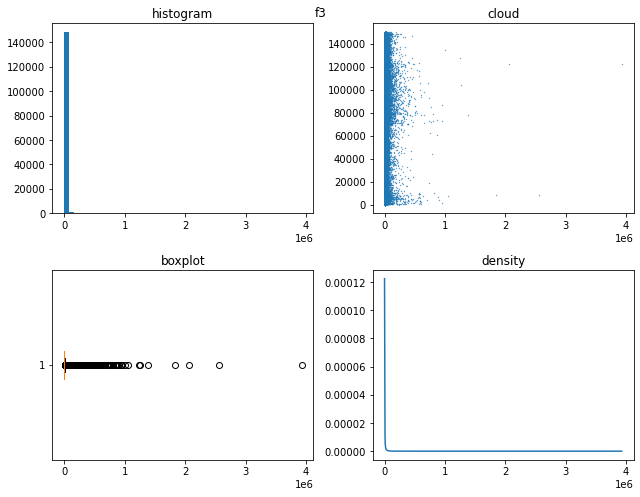

In [23]:
plots("f3")

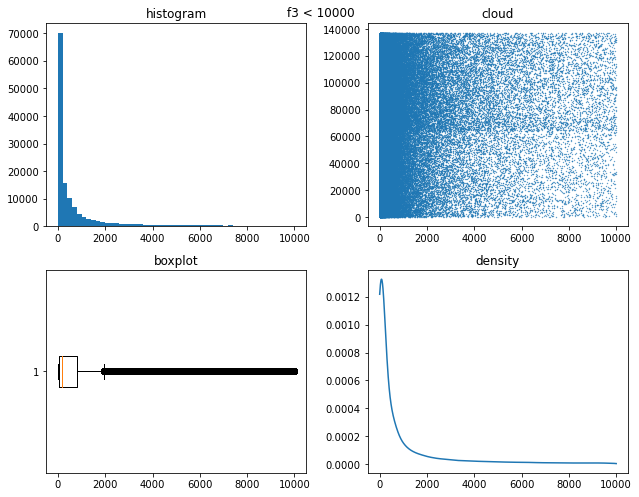

In [24]:
plots("f3", Max=int(1e4))

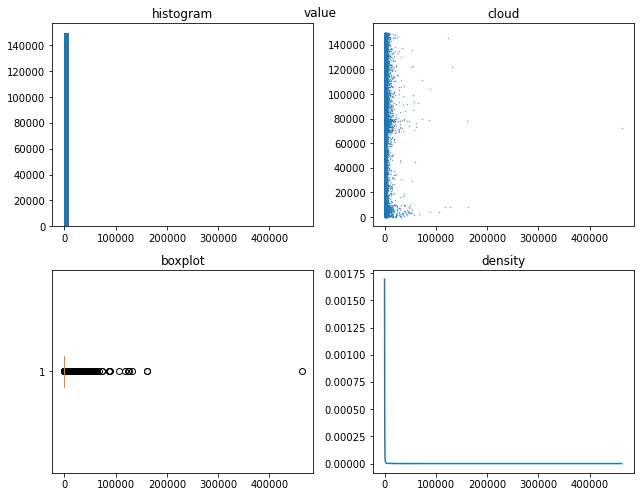

In [25]:
plots("value")

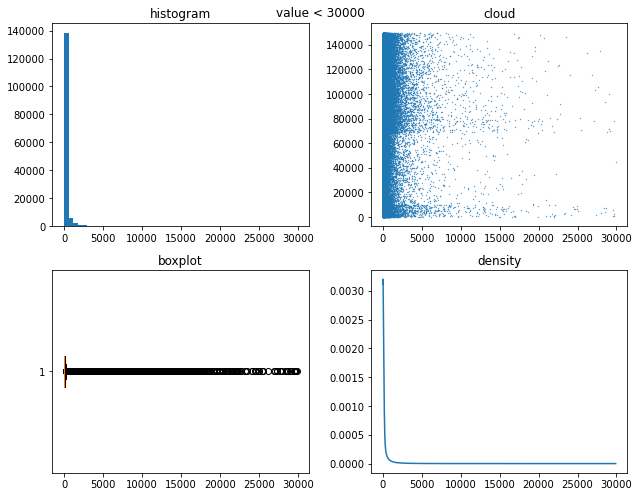

In [26]:
plots("value", Max=int(3e4))

Hence we see that numeric data are in fact heavily skewed.\
We should apply some transformation, most preferably a power transform (Box-Cox/Yeo-Johnson).

In [27]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
to_transform_vars = ['f2', 'f3', 'value']
X1[to_transform_vars] = pt.fit_transform(X1[to_transform_vars])
pt.lambdas_

array([-0.53006411, -0.03099445, -0.16712399])

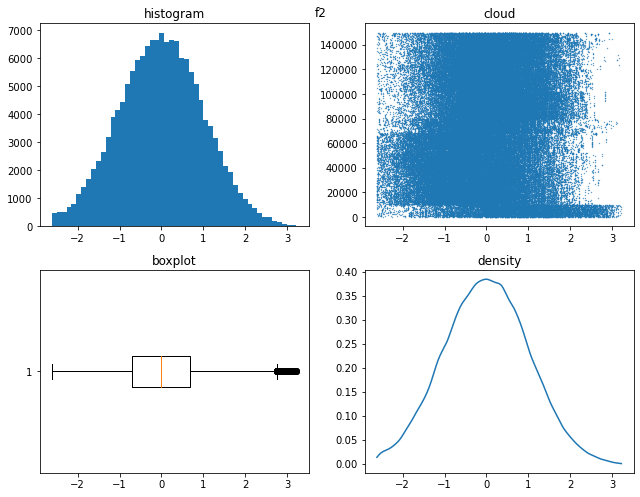

In [28]:
plots("f2")

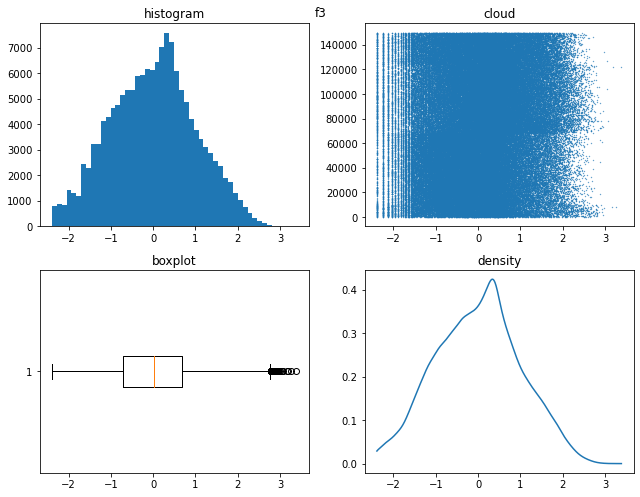

In [29]:
plots("f3")

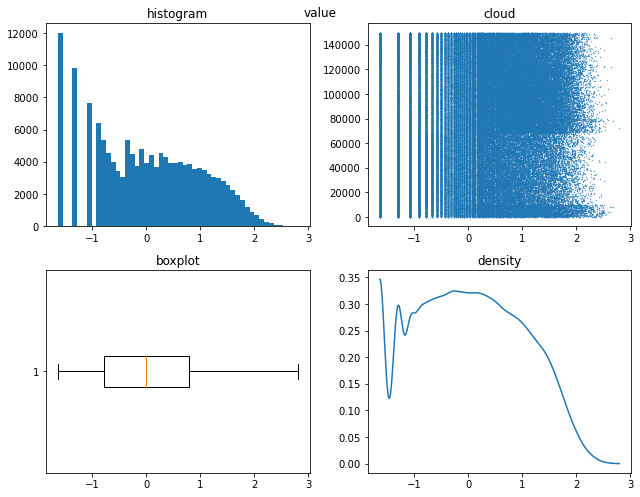

In [30]:
plots("value")

### Pairwise plots for numeric variables

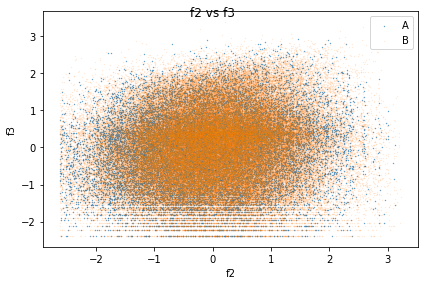

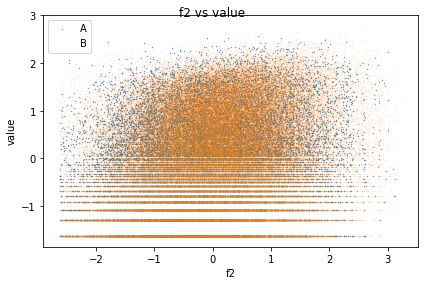

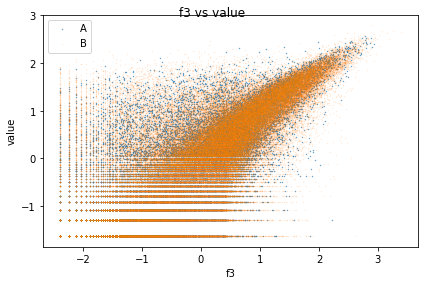

In [31]:
def pairwise(v1, v2, X=X1):
    x1 = X[v1]
    x2 = X[v2]
    fig, ax = plt.subplots()
    A = ax.scatter(x1[y0=="A"], x2[y0=="A"], s=.1)
    B = ax.scatter(x1[y0=="B"], x2[y0=="B"], s=.1, alpha=.2)
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
    ax.legend([A, B], ["A", "B"])
    fig.suptitle("{:s} vs {:s}".format(v1, v2))
    fig.tight_layout()

pairwise('f2', 'f3')
pairwise('f2', 'value')
pairwise('f3', 'value')

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

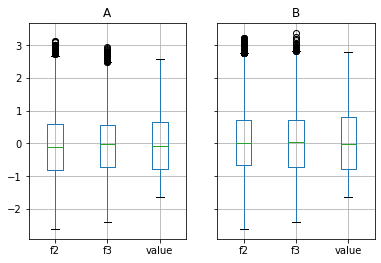

In [32]:
X1.groupby("group").boxplot()

### Conclusons

We may see that there is no clear difference between distributions of any of the predictors when splitting them wrt levels of a `group` variable.\
This means that there is very little chance for obtaining a good classification model, regardless of the method applied.

In [33]:
del X1, sdata   # to spare memory - we shall use only X0 and y0

## Modelling

In [34]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y0)
np.array(np.unique(y, return_counts=True))

array([[     0,      1],
       [ 24572, 125428]], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X0, y, random_state=RANDSTATE)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [ ("pt", PowerTransformer(), ["f2", "f3", "value"]),
      ("oh", OneHotEncoder(), ["f0", "f1", "factor"])
    ],
    remainder="passthrough"
    )

#### DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=RANDSTATE)
pl_dtc = Pipeline([("transformer", ct), ("model", dtc)])

In [55]:
parameters = {'model__criterion':['gini', 'entropy']}
grid = GridSearchCV(pl_dtc, parameters)
grid

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [56]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [57]:
def print_grid_search_cv(grid):
    result = pd.DataFrame(
        {k: grid.cv_results_[k] for k in \
             ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']}
        ).T
    print(result)
print_grid_search_cv(grid)

                                            0                                1
params           {'model__criterion': 'gini'}  {'model__criterion': 'entropy'}
mean_test_score                      0.743467                         0.753458
std_test_score                     0.00288252                       0.00453023
rank_test_score                             2                                1


best params:
{'model__criterion': 'entropy'}
best score: 0.753458
f1 score on test data: 0.853601
score on test data: 0.756240


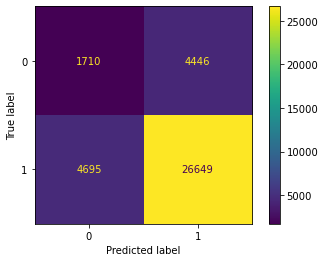

In [58]:
print("best params:")
print((grid.best_params_))
print("best score: {:f}".format(grid.best_score_))

print("f1 score on test data: {:f}".format(f1_score(grid.predict(X_test), y_test)))
print("score on test data: {:f}".format(accuracy_score(grid.predict(X_test), y_test)))
#print(confusion_matrix(grid.predict(X_test), y_test))
plot_confusion_matrix(grid, X_test, y_test)

#### RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=RANDSTATE)
pl_rfc = Pipeline([("transformer", ct), ("model", rfc)])

In [48]:
parameters = {'model__criterion':['gini', 'entropy'],
              'model__n_estimators': [50, 100, 200]}
grid = GridSearchCV(pl_rfc, parameters)
grid

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [50]:
print_grid_search_cv(grid)

                                                                 0  \
params           {'model__criterion': 'gini', 'model__n_estimat...   
mean_test_score                                           0.823236   
std_test_score                                          0.00142289   
rank_test_score                                                  5   

                                                                 1  \
params           {'model__criterion': 'gini', 'model__n_estimat...   
mean_test_score                                           0.824987   
std_test_score                                          0.00104889   
rank_test_score                                                  4   

                                                                 2  \
params           {'model__criterion': 'gini', 'model__n_estimat...   
mean_test_score                                           0.826142   
std_test_score                                          0.00144247   
rank_test_score   

best params:
{'model__criterion': 'entropy', 'model__n_estimators': 200}
best score: 0.826480
f1 score on test data: 0.904225
accuracy score on test data: 0.826693


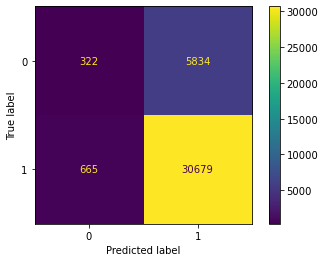

In [52]:
print("best params:")
print((grid.best_params_))
print("best score: {:f}".format(grid.best_score_))

print("f1 score on test data: {:f}".format(f1_score(grid.predict(X_test), y_test)))
print("accuracy score on test data: {:f}".format(accuracy_score(grid.predict(X_test), y_test)))
#print(confusion_matrix(grid.predict(X_test), y_test))
plot_confusion_matrix(grid, X_test, y_test)

The basic concern for both classifiers for these data is very low _specificity_.

#### AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDSTATE)
pl_ada = Pipeline([("transformer", ct), ("model", ada)])

In [59]:
parameters = {'model__learning_rate':[.5, 1, 2],
              'model__n_estimators': [50, 100, 200]}
grid = GridSearchCV(pl_ada, parameters)
grid

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [60]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pt',
                                                                         PowerTransformer(),
                                                                         ['f2',
                                                                          'f3',
                                                                          'value']),
                                                                        ('oh',
                                                                         OneHotEncoder(),
                                                                         ['f0',
                                                                          'f1',
                                                                          'factor'])])),
                           

In [61]:
print_grid_search_cv(grid)

                                                                 0  \
params           {'model__learning_rate': 0.5, 'model__n_estima...   
mean_test_score                                            0.83632   
std_test_score                                         6.53197e-05   
rank_test_score                                                  6   

                                                                 1  \
params           {'model__learning_rate': 0.5, 'model__n_estima...   
mean_test_score                                           0.836356   
std_test_score                                         6.28539e-05   
rank_test_score                                                  5   

                                                                 2  \
params           {'model__learning_rate': 0.5, 'model__n_estima...   
mean_test_score                                           0.836364   
std_test_score                                         6.53197e-05   
rank_test_score   

best params:
{'model__learning_rate': 1, 'model__n_estimators': 50}
best score: 0.836418
f1 score on test data: 0.910631
accuracy score on test data: 0.835947


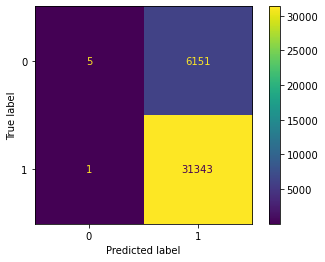

In [62]:
print("best params:")
print((grid.best_params_))
print("best score: {:f}".format(grid.best_score_))

print("f1 score on test data: {:f}".format(f1_score(grid.predict(X_test), y_test)))
print("accuracy score on test data: {:f}".format(accuracy_score(grid.predict(X_test), y_test)))
#print(confusion_matrix(grid.predict(X_test), y_test))
plot_confusion_matrix(grid, X_test, y_test)

Here we see that almost everything was classified as 2nd level i.e. "B" (what is a reasonable first guess as there are many more "B"s then "A"s). It gives high F1 and accuracy score but _specificity_ is near 0.

As stated above, judging from the EDA above it would very difficult to make a good classifier for these data, as there is no apparent difference in predictors distributions when splitting them wrt to levels of target variable.\
However there there are number of other classification methods as well as way more parameter tuning to be done.

The end.